In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

In [20]:
df=pd.read_csv('fashion-mnist_test.csv')
df.shape

(10000, 785)

In [22]:


# Extract labels and features
y = df.iloc[:, 0].values  # First column is the label
X = df.iloc[:, 1:].values  # Remaining columns are pixel values (flattened 28x28 = 784 features)

# Ensure the data is flattened
X = X.reshape(X.shape[0], -1)  # Each image is already a 784-dimensional vector



In [24]:
# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA for noise reduction
pca = PCA(n_components=50)  # Reduce dimensions before t-SNE
X_pca = pca.fit_transform(X_scaled)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)



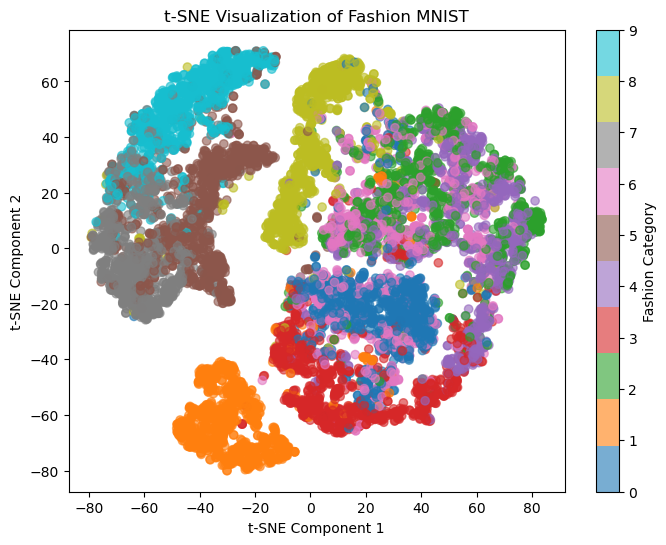

In [25]:
# Plot t-SNE components
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Fashion MNIST')
plt.colorbar(label='Fashion Category')
plt.show()

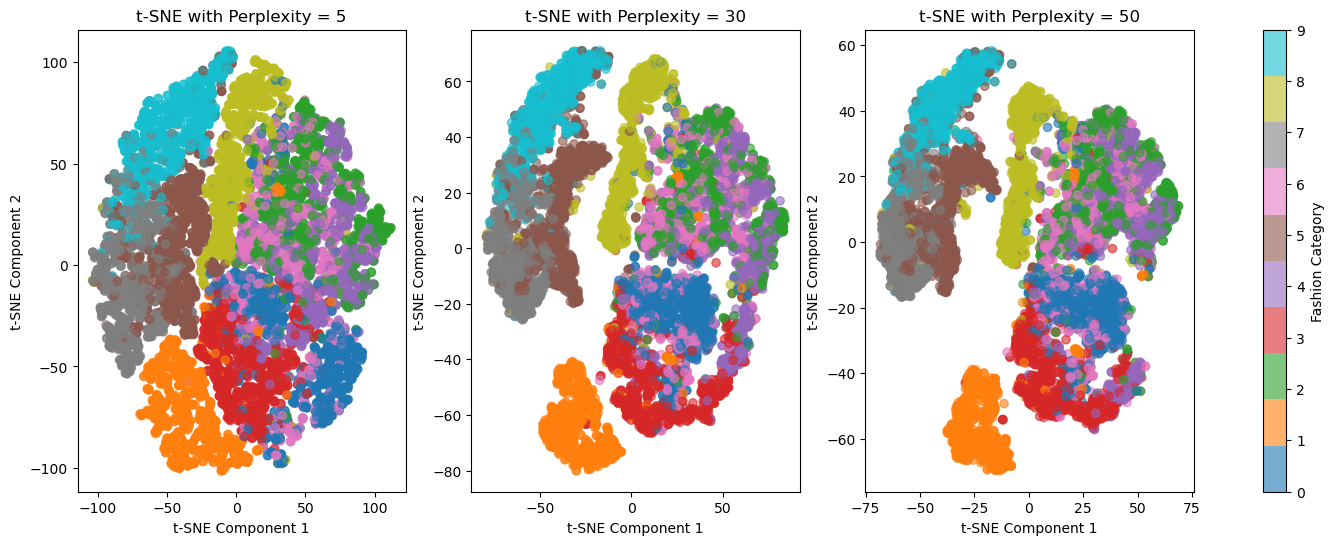

In [28]:
# Apply t-SNE
perplexities = [5, 30, 50]  # Trying different perplexity values
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_pca)
    
    axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.6)
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')
    axes[i].set_title(f't-SNE with Perplexity = {perplexity}')

plt.colorbar(axes[0].collections[0], ax=axes, location='right', label='Fashion Category')
plt.show()


### Comment on cluster separation

***1.Analysis of t-SNE Visualization***

***2.If the clusters are well-separated, t-SNE is effectively capturing patterns in the data***

 ***3.If there is significant overlap, it may indicate that some categories have similar feature distributions***

 ***4.Different perplexity values affect how local vs. global structures are captured***

 ***5.Lower perplexity (e.g., 5) shows tighter clusters but may ignore global structure***

***6.Medium perplexity (e.g., 30) gives a good balance between local and global structure***

***7.Higher perplexity (e.g., 50) may mix categories, reducing separation quality***

***8. Categories like 'T-shirts' and 'Shirts' may overlap, while distinct items like 'Sneakers' may be well-separated***
